In [116]:
#importamos pandas pandas
import pandas as pd
col_names = ['embarazos', 'glucosa', 'presion_arterial', 'skin', 'insulina', 'indice_masa_corporal', 'pedigree', 'edad', 'label']
# carga de los datos
datos = pd.read_csv("./datos/diabetes.csv", header=None, names=col_names)
datos

,embarazos,glucosa,presion_arterial,skin,insulina,indice_masa_corporal,pedigree,edad,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [117]:
#dividir el conjunto de datos en características y variable de destino
caractersiticas_cols = ['embarazos', 'insulina', 'indice_masa_corporal', 'edad','glucosa','presion_arterial','pedigree']
X = datos[caractersiticas_cols] # Características
y = datos.label # variable objetivo

In [118]:
# Se divide X y Y en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [119]:
# se importa las librerias y clases necesarias
from sklearn.linear_model import LogisticRegression

# instanciar el modelo usando parámetros predeterminados
logreg = LogisticRegression(random_state=16)

# ajustar el modelo con datos
logreg.fit(X_train, y_train)

#se hacen predicciones en el conjunto de datos de pruebas X_test
y_pred = logreg.predict(X_test)

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
# se importa la clase de métricas
from sklearn import metrics

#Se hace llamar a la matriz de confusion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

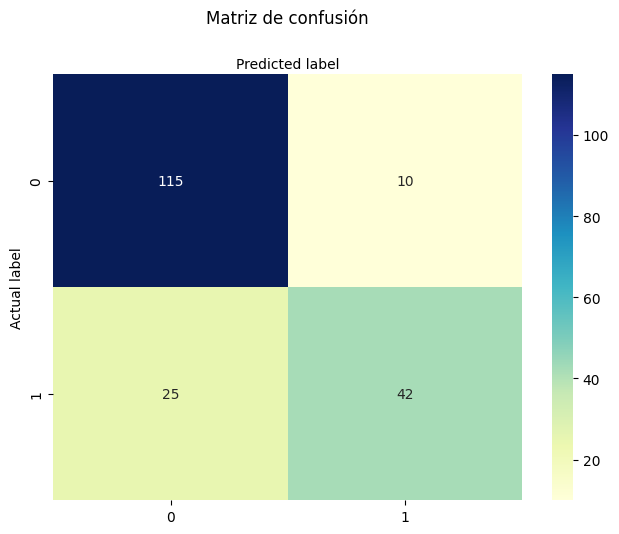

In [121]:
# se importan los modulos requeridos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # nombre de la clase
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text = (0.5,257.44,'Predicted label');

In [122]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



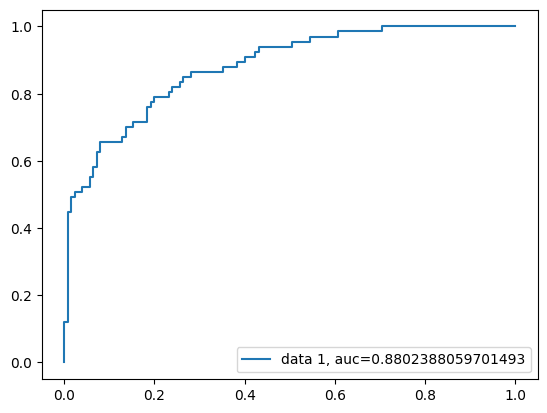

In [123]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()